<a href="https://colab.research.google.com/github/amandakube/rosies_stem/blob/main/notebooks/LinearRegressionExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Linear Regression

The main **purpose** of linear regression is twofold:

1. **Prediction:**
2. **Understanding Relationships:**

In essence, linear regression helps us find and describe a linear relationship between variables.

## Dataset Overview: Palmer Penguins

We will be using the Palmer Penguins dataset, which contains measurements for three species of penguins: Adelie, Gentoo, and Chinstrap.

The features in the dataset include:
- `species`: The species of the penguin.
- `island`: The island where the penguin was found.
- `culmen_length_mm`: The length of the culmen (bill) in millimeters.
- `culmen_depth_mm`: The depth of the culmen in millimeters.
- `flipper_length_mm`: The length of the flipper in millimeters.
- `body_mass_g`: The body mass of the penguin in grams.
- `sex`: The sex of the penguin.

Our goal is to predict the `body_mass_g` using other features.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
penguins = pd.read_csv("penguins_size.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
display(penguins.head())

# Check for missing values
print("\nMissing values in each column:")
print(penguins.isnull().sum())

# Drop rows with missing values for simplicity in this tutorial
penguins = penguins.dropna()

print("\nDataset shape after dropping missing values:")
print(penguins.shape)

First 5 rows of the dataset:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE



Missing values in each column:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Dataset shape after dropping missing values:
(334, 7)


## Simple Linear Regression: Predicting Body Mass from Culmen Length

Let's start with a simple linear regression model where we use only one feature, `culmen_length_mm`, to predict `body_mass_g`.

We will use `scikit-learn` for model training and prediction, and `statsmodels` for a detailed statistical summary.

#Can we use culmen length to predict a penguin's body mass?

![What is Culmen Length?](https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=medium)
*Image credit: Allison Horst (https://allisonhorst.github.io/palmerpenguins/articles/art.html)*


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Select features and target
X_simple = penguins[['culmen_length_mm']]  # Feature (must be a 2D array-like)
y = penguins['body_mass_g']        # Target

# Split data into training and testing sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# --- Scikit-learn Model ---
# Create linear regression object
regr_simple_sk = LinearRegression()

# Train the model using the training sets
regr_simple_sk.fit(X_train_simple, y_train)

# Make predictions using the testing set
y_pred_simple_sk = regr_simple_sk.predict(X_test_simple)

# The coefficients
print('Scikit-learn Simple Regression Coefficients: \n', regr_simple_sk.coef_)
print('Scikit-learn Simple Regression Intercept: \n', regr_simple_sk.intercept_)

# The mean squared error
print('Scikit-learn Simple Regression Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_simple_sk))

# --- Statsmodels Model ---
# Add a constant to the independent variable for the intercept
X_train_simple_sm = sm.add_constant(X_train_simple)
X_test_simple_sm = sm.add_constant(X_test_simple)

# Create a OLS model
model_simple_sm = sm.OLS(y_train, X_train_simple_sm)

# Fit the model
results_simple_sm = model_simple_sm.fit()

# Print the summary of the results
print('\nStatsmodels Simple Regression Summary:')
print(results_simple_sm.summary())

# Make predictions on the test set
y_pred_simple_sm = results_simple_sm.predict(X_test_simple_sm)

# The mean squared error using statsmodels predictions
print('\nStatsmodels Simple Regression Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_simple_sm))

Scikit-learn Simple Regression Coefficients: 
 [90.56941831]
Scikit-learn Simple Regression Intercept: 
 223.62200165002514
Scikit-learn Simple Regression Mean squared error: 443075.91

Statsmodels Simple Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     150.8
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           9.58e-28
Time:                        22:54:52   Log-Likelihood:                -2106.4
No. Observations:                 267   AIC:                             4217.
Df Residuals:                     265   BIC:                             4224.
Df Model:                           1                                         
Covariance Type:            nonrobust                           

## Visualizing Simple Linear Regression

Let's visualize the simple linear regression model by plotting the actual test data and the regression line.

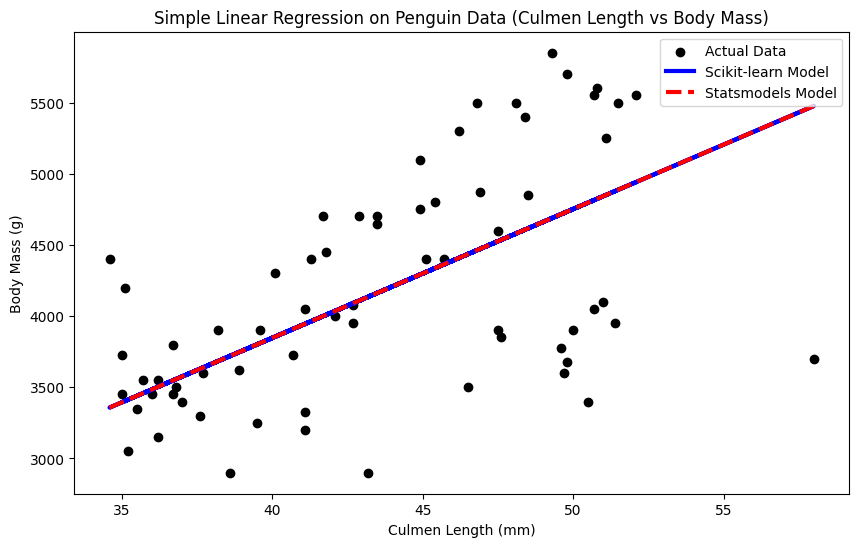

In [ ]:
# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='black', label='Actual Data')
plt.plot(X_test_simple, y_pred_simple_sk, color='blue', linewidth=3, label='Scikit-learn Model')

# Sort X_test for plotting the statsmodels line
X_test_simple_sorted, y_pred_simple_sm_sorted = zip(*sorted(zip(X_test_simple['culmen_length_mm'], y_pred_simple_sm)))
plt.plot(X_test_simple_sorted, y_pred_simple_sm_sorted, color='red', linestyle='--', linewidth=3, label='Statsmodels Model')


plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Simple Linear Regression on Penguin Data (Culmen Length vs Body Mass)')
plt.legend()
plt.show()

## Multiple Linear Regression: Using More Features

Now, let's build a multiple linear regression model using `culmen_length_mm`, `culmen_depth_mm`, and `flipper_length_mm` to predict `body_mass_g`.

In [ ]:
# Select features (multiple) and target
features_multi = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
X_multi = penguins[features_multi]  # Features (must be a 2D array-like)
y = penguins['body_mass_g']        # Target

# Split data into training and testing sets
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# --- Scikit-learn Model ---
# Create linear regression object
regr_multi_sk = LinearRegression()

# Train the model using the training sets
regr_multi_sk.fit(X_train_multi, y_train)

# Make predictions using the testing set
y_pred_multi_sk = regr_multi_sk.predict(X_test_multi)

# The coefficients
print('Scikit-learn Multiple Regression Coefficients: \n', regr_multi_sk.coef_)
print('Scikit-learn Multiple Regression Intercept: \n', regr_multi_sk.intercept_)

# The mean squared error
print('Scikit-learn Multiple Regression Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_multi_sk))

# --- Statsmodels Model ---
# Add a constant to the independent variable for the intercept
X_train_multi_sm = sm.add_constant(X_train_multi)
X_test_multi_sm = sm.add_constant(X_test_multi)

# Create a OLS model
model_multi_sm = sm.OLS(y_train, X_train_multi_sm)

# Fit the model
results_multi_sm = model_multi_sm.fit()

# Print the summary of the results
print('\nStatsmodels Multiple Regression Summary:')
print(results_multi_sm.summary())

# Make predictions on the test set
y_pred_multi_sm = results_multi_sm.predict(X_test_multi_sm)

# The mean squared error using statsmodels predictions
print('\nStatsmodels Multiple Regression Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_multi_sm))

Scikit-learn Multiple Regression Coefficients: 
 [ 3.15698596 13.31216076 50.76073962]
Scikit-learn Multiple Regression Intercept: 
 -6358.115572512317
Scikit-learn Multiple Regression Mean squared error: 137599.06

Statsmodels Multiple Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.50e-81
Time:                        23:06:39   Log-Likelihood:                -1975.2
No. Observations:                 267   AIC:                             3958.
Df Residuals:                     263   BIC:                             3973.
Df Model:                           3                                         
Covariance Type:            nonr

## Comparing Simple and Multiple Linear Regression Models

Let's compare the performance of the simple and multiple linear regression models using Mean Squared Error (MSE) and R-squared (from the statsmodels summary).

A lower MSE indicates better prediction accuracy. R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher R-squared indicates a better fit.

In [ ]:
# Compare Mean Squared Error
print("Comparison of Mean Squared Error:")
print(f"Simple Linear Regression MSE: {mean_squared_error(y_test, y_pred_simple_sk):.2f}")
print(f"Multiple Linear Regression MSE: {mean_squared_error(y_test, y_pred_multi_sk):.2f}")

# Compare R-squared from Statsmodels summaries
print("\nComparison of R-squared:")
print(f"Simple Linear Regression R-squared: {results_simple_sm.rsquared:.2f}")
print(f"Multiple Linear Regression R-squared: {results_multi_sm.rsquared:.2f}")

Comparison of Mean Squared Error:
Simple Linear Regression MSE: 443075.91
Multiple Linear Regression MSE: 137599.06

Comparison of R-squared:
Simple Linear Regression R-squared: 0.36
Multiple Linear Regression R-squared: 0.76


## Interpreting the Statsmodels Summary

The statsmodels summary provides valuable information about the regression model. Let's look at the key parts:

- **R-squared and Adj. R-squared:**
- **Coefficients (coef):**
- **P>|t| (P-value):**
- **Confidence Intervals [0.025, 0.975]:**

By examining the p-values in the multiple regression summary, you can identify which features are the most significant predictors of body mass.

## Further Exploration

- **Explore categorical features:** red heart
- **Check for assumptions:** blue heart
- **Regularization techniques:** yellow heart
- **Other regression algorithms:** green heart